In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("covid_19.csv")
print(df)

         Sno        Date     Time State/UnionTerritory  \
0          1  2020-01-30  6:00 PM               Kerala   
1          2  2020-01-31  6:00 PM               Kerala   
2          3  2020-02-01  6:00 PM               Kerala   
3          4  2020-02-02  6:00 PM               Kerala   
4          5  2020-02-03  6:00 PM               Kerala   
...      ...         ...      ...                  ...   
18105  18106  2021-08-11  8:00 AM            Telangana   
18106  18107  2021-08-11  8:00 AM              Tripura   
18107  18108  2021-08-11  8:00 AM          Uttarakhand   
18108  18109  2021-08-11  8:00 AM        Uttar Pradesh   
18109  18110  2021-08-11  8:00 AM          West Bengal   

      ConfirmedIndianNational ConfirmedForeignNational    Cured  Deaths  \
0                           1                        0        0       0   
1                           1                        0        0       0   
2                           2                        0        0       0   
3  

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB
None


In [14]:
print(df.columns)

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')


In [15]:
print(df.head(10))
print(df.tail(10))

   Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   
5    6  2020-02-04  6:00 PM               Kerala                       3   
6    7  2020-02-05  6:00 PM               Kerala                       3   
7    8  2020-02-06  6:00 PM               Kerala                       3   
8    9  2020-02-07  6:00 PM               Kerala                       3   
9   10  2020-02-08  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1 

In [16]:
print(df.describe())

                Sno         Cured         Deaths     Confirmed
count  18110.000000  1.811000e+04   18110.000000  1.811000e+04
mean    9055.500000  2.786375e+05    4052.402264  3.010314e+05
std     5228.051023  6.148909e+05   10919.076411  6.561489e+05
min        1.000000  0.000000e+00       0.000000  0.000000e+00
25%     4528.250000  3.360250e+03      32.000000  4.376750e+03
50%     9055.500000  3.336400e+04     588.000000  3.977350e+04
75%    13582.750000  2.788698e+05    3643.750000  3.001498e+05
max    18110.000000  6.159676e+06  134201.000000  6.363442e+06


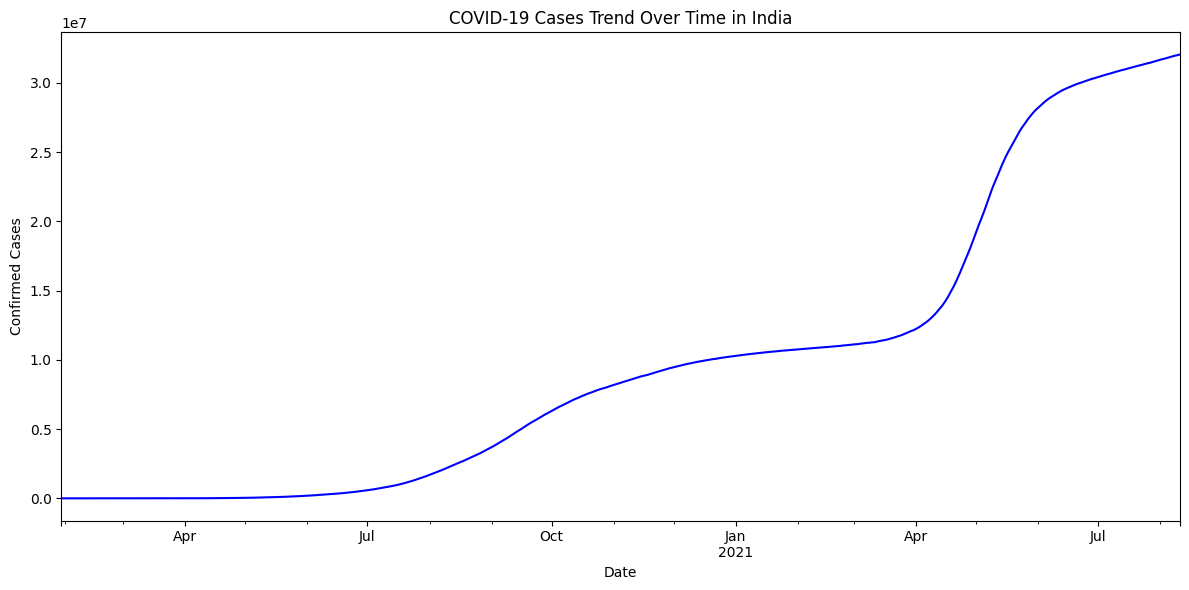

In [17]:
df['Date'] = pd.to_datetime(df['Date']) # convert date to datetime 
trend = df.groupby("Date")["Confirmed"].sum()
plt.figure(figsize=(12,6))
trend.plot(color='blue')
plt.title("COVID-19 Cases Trend Over Time in India")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.tight_layout()
plt.savefig("line_chart.png")
plt.show()

State/UnionTerritory
Daman & Diu                                     2
Unassigned                                     77
Andaman and Nicobar Islands                  7548
Cases being reassigned to states             9265
Lakshadweep                                 10263
Dadra and Nagar Haveli                      10377
Dadra and Nagar Haveli and Daman and Diu    10654
Ladakh                                      20411
Sikkim                                      28018
Nagaland                                    28811
Name: Confirmed, dtype: int64


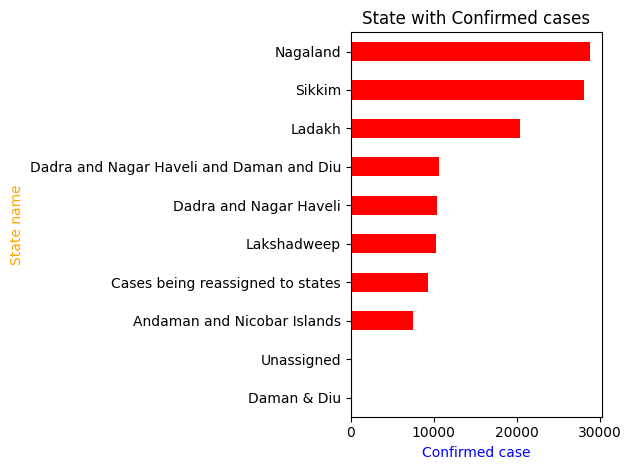

In [18]:
sate_case = df.groupby("State/UnionTerritory")["Confirmed"].max().sort_values(ascending=True).head(10)
print(sate_case)
plt.Figure(figsize=(10, 6))
sate_case.plot(kind= "barh", color = "red")
plt.xlabel("Confirmed case",color = "blue")
plt.ylabel("State name",color = "orange")
plt.title("State with Confirmed cases")
plt.tight_layout()
plt.savefig("bar_chart.png")
plt.show()

State/UnionTerritory
Maharashtra       6363442
Maharashtra***    6229596
Kerala            3586693
Karnataka         2921049
Karanataka        2885238
Tamil Nadu        2579130
Andhra Pradesh    1985182
Uttar Pradesh     1708812
West Bengal       1534999
Delhi             1436852
Name: Confirmed, dtype: int64


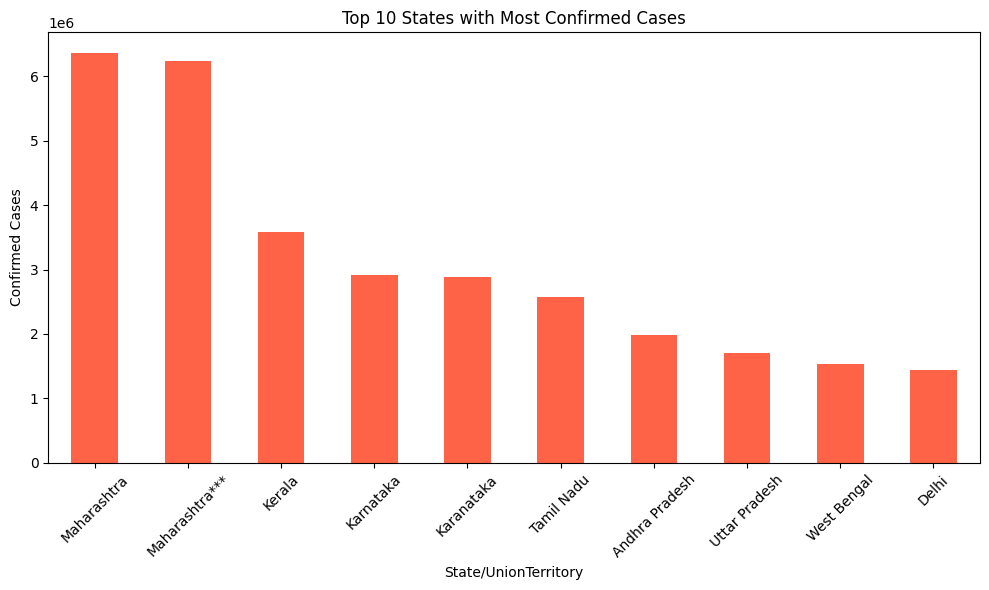

In [19]:
state_cases = df.groupby("State/UnionTerritory")["Confirmed"].max().sort_values(ascending=False).head(10)
print(state_cases)
plt.figure(figsize=(10,6))
state_cases.plot(kind='bar', color='tomato')
plt.title("Top 10 States with Most Confirmed Cases")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("bar_chart.png")
plt.show()
    

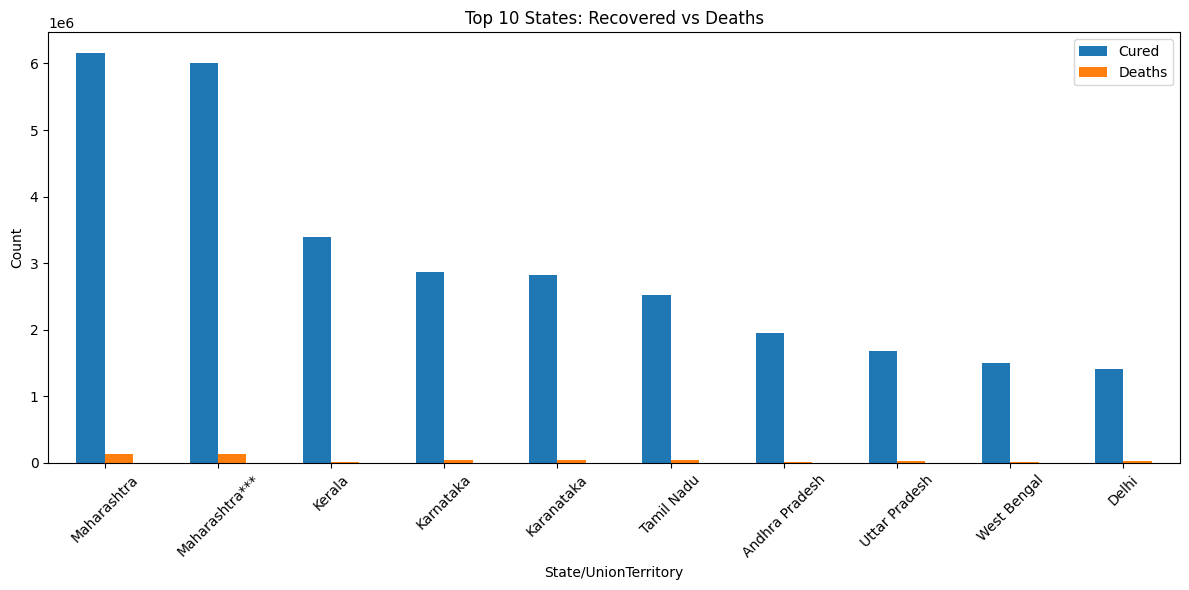

In [20]:
latest = df.groupby("State/UnionTerritory").max()[["Cured", "Deaths"]]
latest = latest.sort_values(by="Cured", ascending=False).head(10)
latest.plot(kind="bar", figsize=(12,6))
plt.title("Top 10 States: Recovered vs Deaths")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("recovered_vs_deaths.png")
plt.show()

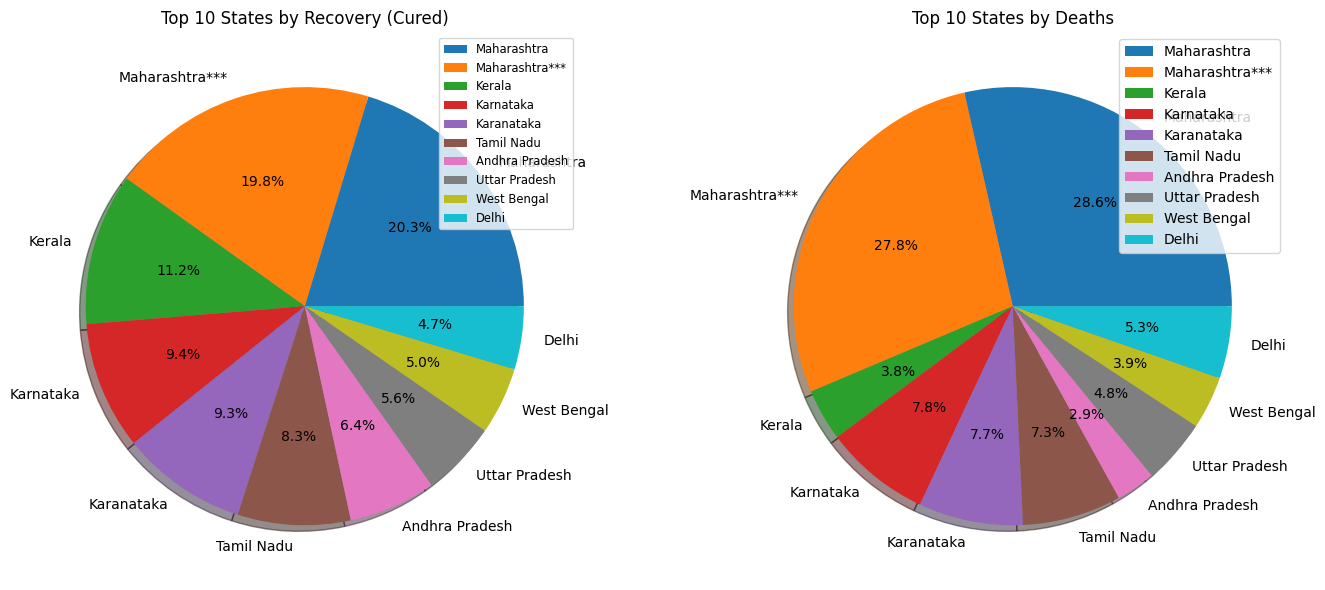

In [21]:
latest = df.groupby("State/UnionTerritory").max()[["Cured", "Deaths"]]
latest = latest.sort_values(by="Cured", ascending=False).head(10)

plt.figure(figsize=(14,6))

# Left subplot - Cured
plt.subplot(1, 2, 1)
plt.pie(latest["Cured"], labels=latest.index, autopct="%1.1f%%", shadow=True)
plt.title("Top 10 States by Recovery (Cured)")
plt.legend(loc="upper right", fontsize="small")

# Right subplot - Deaths
plt.subplot(1, 2, 2)
plt.pie(latest["Deaths"], labels=latest.index, autopct="%1.1f%%", shadow=True)
plt.title("Top 10 States by Deaths")
plt.legend(loc="upper right")

plt.tight_layout()
plt.savefig("recovered_vs_deaths_pie.png")
plt.show()

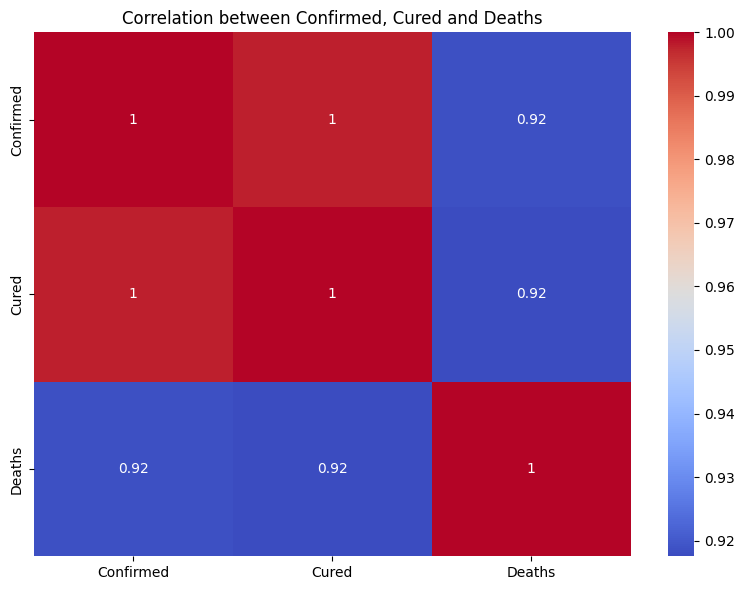

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Confirmed", "Cured", "Deaths"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Confirmed, Cured and Deaths")
plt.tight_layout()
plt.savefig("hetmap.png")
plt.show()